In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


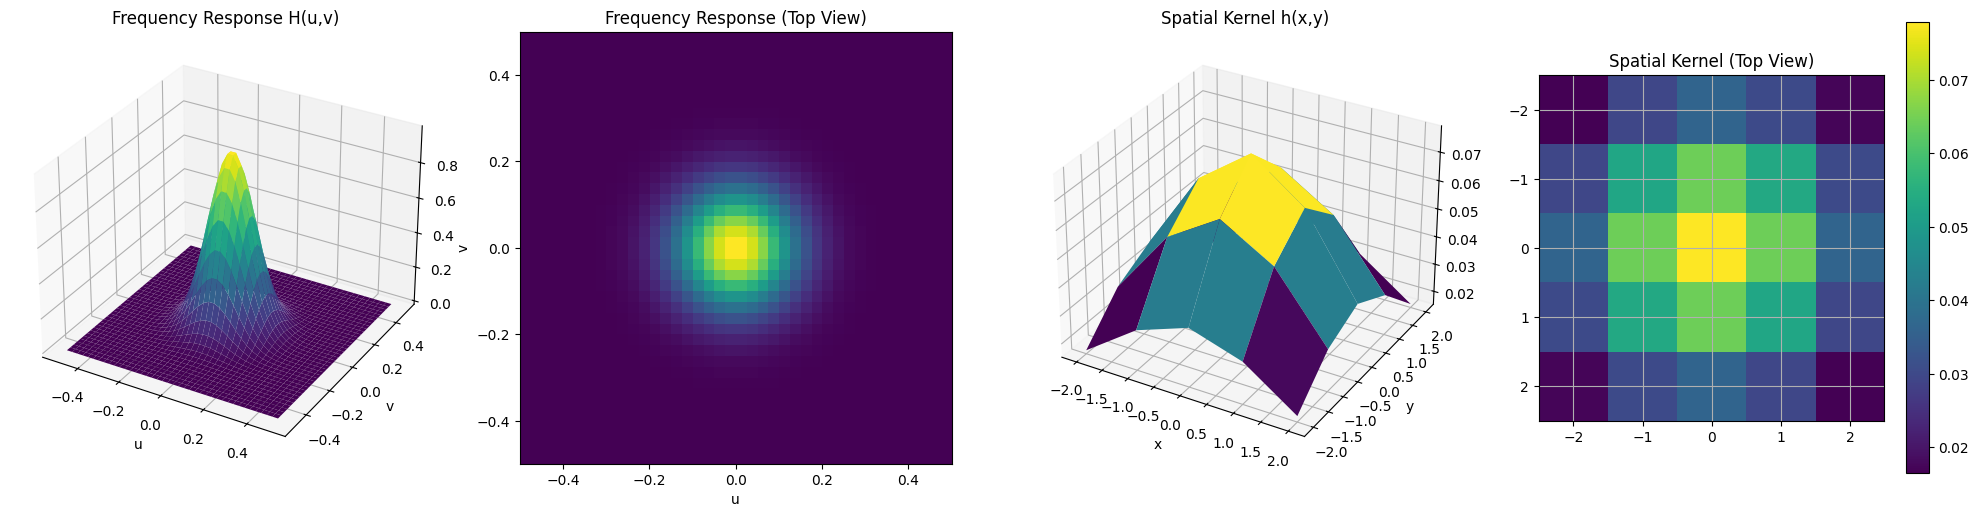


Spatial Filter Kernel Coefficients (5x5), centered at (0,0):
Index range: -2 to 2 in both x and y
[[0.0165 0.0296 0.0363 0.0303 0.0173]
 [0.0296 0.0528 0.0643 0.0535 0.0303]
 [0.0363 0.0643 0.0778 0.0643 0.0363]
 [0.0303 0.0535 0.0643 0.0528 0.0296]
 [0.0173 0.0303 0.0363 0.0296 0.0165]]

Kernel with coordinates (y,x):
h(-2,-2) = 0.0165  h(-2,-1) = 0.0296  h(-2,0) = 0.0363  h(-2,1) = 0.0303  h(-2,2) = 0.0173  
h(-1,-2) = 0.0296  h(-1,-1) = 0.0528  h(-1,0) = 0.0643  h(-1,1) = 0.0535  h(-1,2) = 0.0303  
h(0,-2) = 0.0363  h(0,-1) = 0.0643  h(0,0) = 0.0778  h(0,1) = 0.0643  h(0,2) = 0.0363  
h(1,-2) = 0.0303  h(1,-1) = 0.0535  h(1,0) = 0.0643  h(1,1) = 0.0528  h(1,2) = 0.0296  
h(2,-2) = 0.0173  h(2,-1) = 0.0303  h(2,0) = 0.0363  h(2,1) = 0.0296  h(2,2) = 0.0165  

Kernel Properties:
Sum of coefficients: 1.000000
Center coefficient h(0,0): 0.077796
Maximum value: 0.077796

Array details:
Padded size: 40x40
Center position: 20
Offset from center: ±2
Extracted indices: 18 to 22


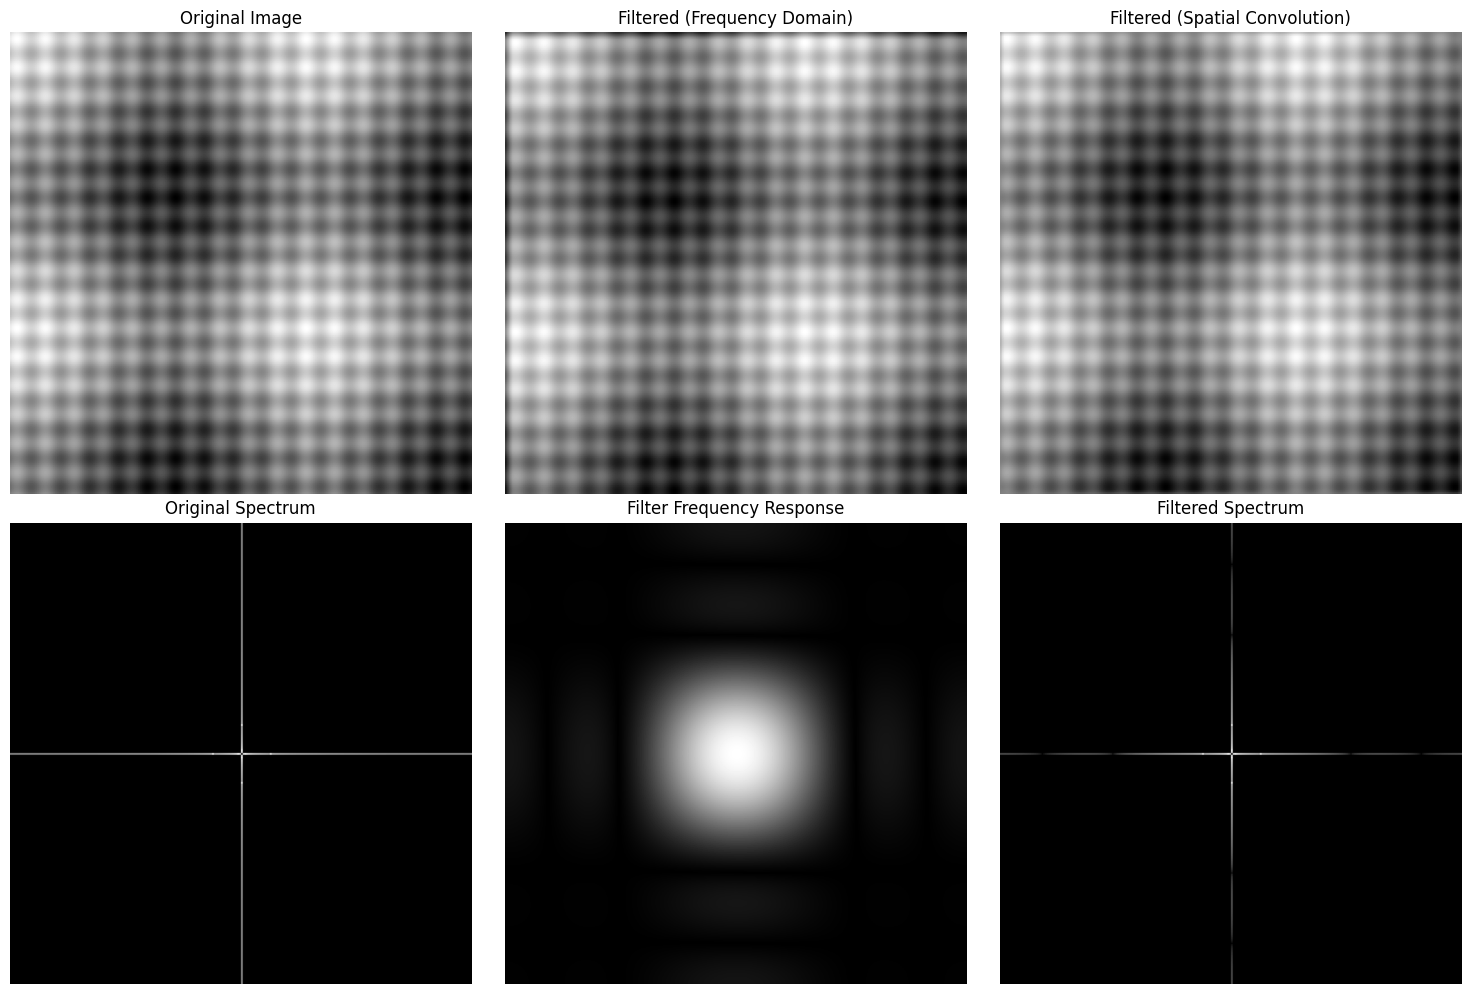


MSE between frequency and spatial filtering: 1.73e-01


In [13]:

def design_filter_kernel():
    """Design a 3x3 filter kernel with correct centering."""

    # 1. Create frequency grid
    kernel_size = 5
    padding_factor = 8
    padded_size = kernel_size * padding_factor

    # Create frequency coordinates
    u = np.linspace(-0.5, 0.5, padded_size)
    v = np.linspace(-0.5, 0.5, padded_size)
    U, V = np.meshgrid(u, v)

    # 2. Design frequency response (Gaussian lowpass)
    D = np.sqrt(U**2 + V**2)
    sigma = 0.1
    H = np.exp(-D**2 / (2 * sigma**2))

    # 3. Compute inverse FFT to get spatial kernel
    H_shifted = np.fft.fftshift(H)
    h = np.real(np.fft.ifft2(H_shifted))
    h = np.fft.fftshift(h)

    # 4. Extract center portion with correct centering
    center = padded_size // 2  # center position (6 for 12x12)
    offset = kernel_size // 2  # how many positions to take around center (1 for 3x3)

    h_kernel = h[center-offset:center+offset+1,
                 center-offset:center+offset+1]
    h_kernel = h_kernel / np.sum(h_kernel)

    # Create properly centered coordinate grids for visualization
    x = np.arange(-offset, offset+1)  # -1, 0, 1 for 3x3
    y = np.arange(-offset, offset+1)
    X, Y = np.meshgrid(x, y)

    # Visualize results
    fig = plt.figure(figsize=(20, 5))

    # Plot frequency response
    ax1 = fig.add_subplot(141, projection='3d')
    ax1.plot_surface(U, V, H, cmap='viridis')
    ax1.set_title('Frequency Response H(u,v)')
    ax1.set_xlabel('u')
    ax1.set_ylabel('v')

    # Plot frequency response as image
    ax2 = fig.add_subplot(142)
    ax2.imshow(H, cmap='viridis', extent=[-0.5, 0.5, -0.5, 0.5])
    ax2.set_title('Frequency Response (Top View)')
    ax2.set_xlabel('u')
    ax2.set_ylabel('v')

    # Plot spatial kernel in 3D with centered coordinates
    ax3 = fig.add_subplot(143, projection='3d')
    ax3.plot_surface(X, Y, h_kernel, cmap='viridis')
    ax3.set_title('Spatial Kernel h(x,y)')
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')

    # Plot spatial kernel as image with centered indices
    ax4 = fig.add_subplot(144)
    im = ax4.imshow(h_kernel, cmap='viridis',
                    extent=[-offset-0.5, offset+0.5, offset+0.5, -offset-0.5])
    ax4.set_title('Spatial Kernel (Top View)')
    ax4.grid(True)
    ax4.set_xticks(range(-offset, offset+1))
    ax4.set_yticks(range(-offset, offset+1))
    plt.colorbar(im)

    plt.tight_layout()
    plt.show()

    # Print kernel coefficients with centered indices
    print(f"\nSpatial Filter Kernel Coefficients ({kernel_size}x{kernel_size}), centered at (0,0):")
    print(f"Index range: -{offset} to {offset} in both x and y")
    np.set_printoptions(precision=4, suppress=True)
    print(h_kernel)

    # Print kernel as matrix with coordinates
    print("\nKernel with coordinates (y,x):")
    for i, row in enumerate(range(-offset, offset+1)):
        for j, col in enumerate(range(-offset, offset+1)):
            print(f"h({row},{col}) = {h_kernel[i,j]:.4f}  ", end='')
        print()

    # Verify kernel properties
    print("\nKernel Properties:")
    print(f"Sum of coefficients: {np.sum(h_kernel):.6f}")
    print(f"Center coefficient h(0,0): {h_kernel[offset,offset]:.6f}")
    print(f"Maximum value: {np.max(h_kernel):.6f}")

    # Print padded size and center information
    print("\nArray details:")
    print(f"Padded size: {padded_size}x{padded_size}")
    print(f"Center position: {center}")
    print(f"Offset from center: ±{offset}")
    print(f"Extracted indices: {center-offset} to {center+offset}")

    return h_kernel

def test_filter_kernel(kernel):
    """Test the designed kernel on an image."""
    # Create test image with different frequency components
    size = 256
    x = np.linspace(-10, 10, size)
    y = np.linspace(-10, 10, size)
    X, Y = np.meshgrid(x, y)

    # Create image with low and high frequency components
    low_freq = np.sin(0.5*X) + np.sin(0.5*Y)
    high_freq = 0.5 * (np.sin(5*X) + np.sin(5*Y))
    test_image = low_freq + high_freq

    # Apply filter using frequency domain
    H_freq = np.fft.fft2(kernel, s=test_image.shape)
    H_freq = np.fft.fftshift(H_freq)
    F = np.fft.fft2(test_image)
    F_shift = np.fft.fftshift(F)
    G_shift = F_shift * H_freq
    filtered_freq = np.real(np.fft.ifft2(np.fft.ifftshift(G_shift)))

    # Apply filter using spatial convolution
    from scipy.signal import convolve2d
    filtered_spatial = convolve2d(test_image, kernel, mode='same')

    # Visualize results
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    axes[0,0].imshow(test_image, cmap='gray')
    axes[0,0].set_title('Original Image')

    axes[0,1].imshow(filtered_freq, cmap='gray')
    axes[0,1].set_title('Filtered (Frequency Domain)')

    axes[0,2].imshow(filtered_spatial, cmap='gray')
    axes[0,2].set_title('Filtered (Spatial Convolution)')

    # Show frequency spectra
    axes[1,0].imshow(np.log(1 + np.abs(F_shift)), cmap='gray')
    axes[1,0].set_title('Original Spectrum')

    axes[1,1].imshow(np.abs(H_freq), cmap='gray')
    axes[1,1].set_title('Filter Frequency Response')

    axes[1,2].imshow(np.log(1 + np.abs(G_shift)), cmap='gray')
    axes[1,2].set_title('Filtered Spectrum')

    for ax in axes.flat:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

    # Compare frequency and spatial domain results
    mse = np.mean((filtered_freq - filtered_spatial)**2)
    print(f"\nMSE between frequency and spatial filtering: {mse:.2e}")




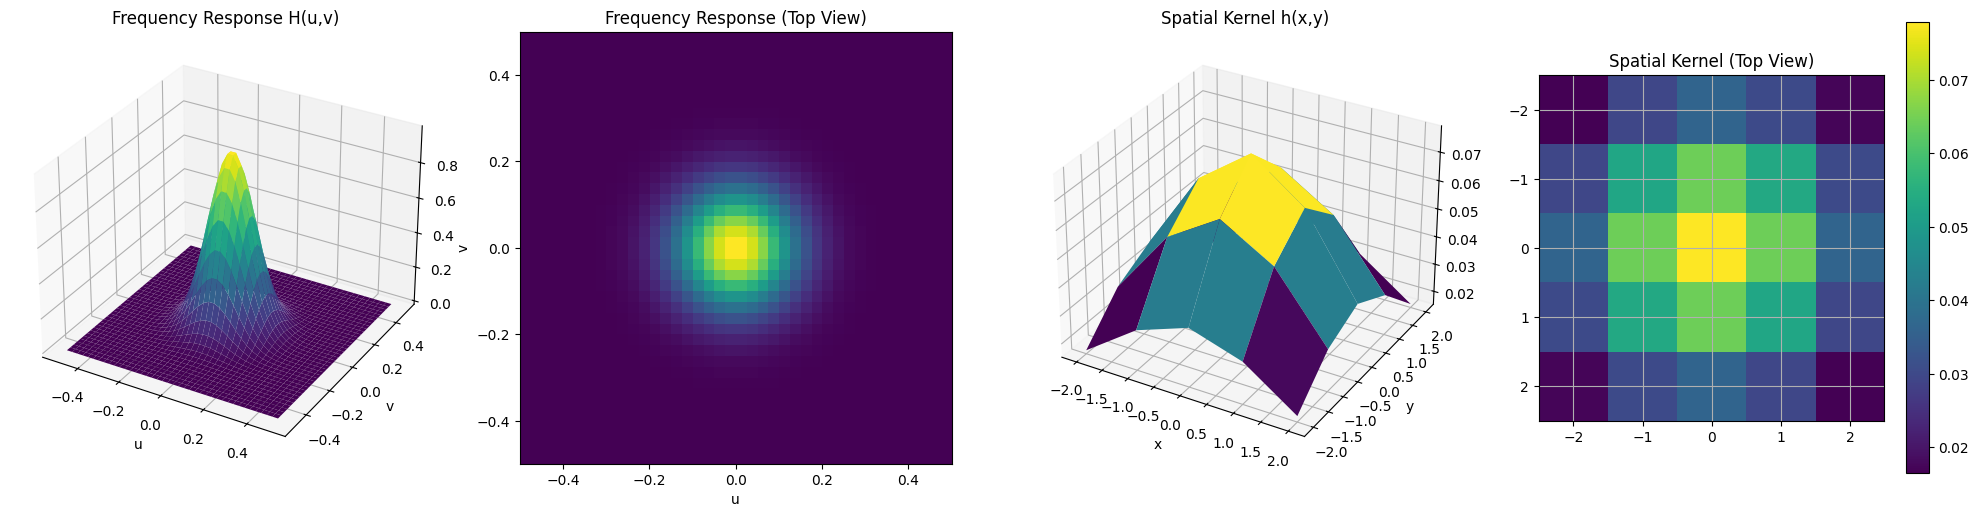


Spatial Filter Kernel Coefficients (5x5), centered at (0,0):
Index range: -2 to 2 in both x and y
[[0.0165 0.0296 0.0363 0.0303 0.0173]
 [0.0296 0.0528 0.0643 0.0535 0.0303]
 [0.0363 0.0643 0.0778 0.0643 0.0363]
 [0.0303 0.0535 0.0643 0.0528 0.0296]
 [0.0173 0.0303 0.0363 0.0296 0.0165]]

Kernel with coordinates (y,x):
h(-2,-2) = 0.0165  h(-2,-1) = 0.0296  h(-2,0) = 0.0363  h(-2,1) = 0.0303  h(-2,2) = 0.0173  
h(-1,-2) = 0.0296  h(-1,-1) = 0.0528  h(-1,0) = 0.0643  h(-1,1) = 0.0535  h(-1,2) = 0.0303  
h(0,-2) = 0.0363  h(0,-1) = 0.0643  h(0,0) = 0.0778  h(0,1) = 0.0643  h(0,2) = 0.0363  
h(1,-2) = 0.0303  h(1,-1) = 0.0535  h(1,0) = 0.0643  h(1,1) = 0.0528  h(1,2) = 0.0296  
h(2,-2) = 0.0173  h(2,-1) = 0.0303  h(2,0) = 0.0363  h(2,1) = 0.0296  h(2,2) = 0.0165  

Kernel Properties:
Sum of coefficients: 1.000000
Center coefficient h(0,0): 0.077796
Maximum value: 0.077796

Array details:
Padded size: 40x40
Center position: 20
Offset from center: ±2
Extracted indices: 18 to 22


In [14]:
# Design and test the filter
kernel = design_filter_kernel()



Spatial Filter Kernel Coefficients (5x5), centered at (0,0):
Index range: -2 to 2 in both x and y
[[0.0165 0.0296 0.0363 0.0303 0.0173]
 [0.0296 0.0528 0.0643 0.0535 0.0303]
 [0.0363 0.0643 0.0778 0.0643 0.0363]
 [0.0303 0.0535 0.0643 0.0528 0.0296]
 [0.0173 0.0303 0.0363 0.0296 0.0165]]

Kernel with coordinates (y,x):
h(-2,-2) = 0.0165  h(-2,-1) = 0.0296  h(-2,0) = 0.0363  h(-2,1) = 0.0303  h(-2,2) = 0.0173  
h(-1,-2) = 0.0296  h(-1,-1) = 0.0528  h(-1,0) = 0.0643  h(-1,1) = 0.0535  h(-1,2) = 0.0303  
h(0,-2) = 0.0363  h(0,-1) = 0.0643  h(0,0) = 0.0778  h(0,1) = 0.0643  h(0,2) = 0.0363  
h(1,-2) = 0.0303  h(1,-1) = 0.0535  h(1,0) = 0.0643  h(1,1) = 0.0528  h(1,2) = 0.0296  
h(2,-2) = 0.0173  h(2,-1) = 0.0303  h(2,0) = 0.0363  h(2,1) = 0.0296  h(2,2) = 0.0165  

Kernel Properties:
Sum of coefficients: 1.000000
Center coefficient h(0,0): 0.077796
Maximum value: 0.077796

Array details:
Padded size: 40x40
Center position: 20
Offset from center: ±2
Extracted indices: 18 to 22


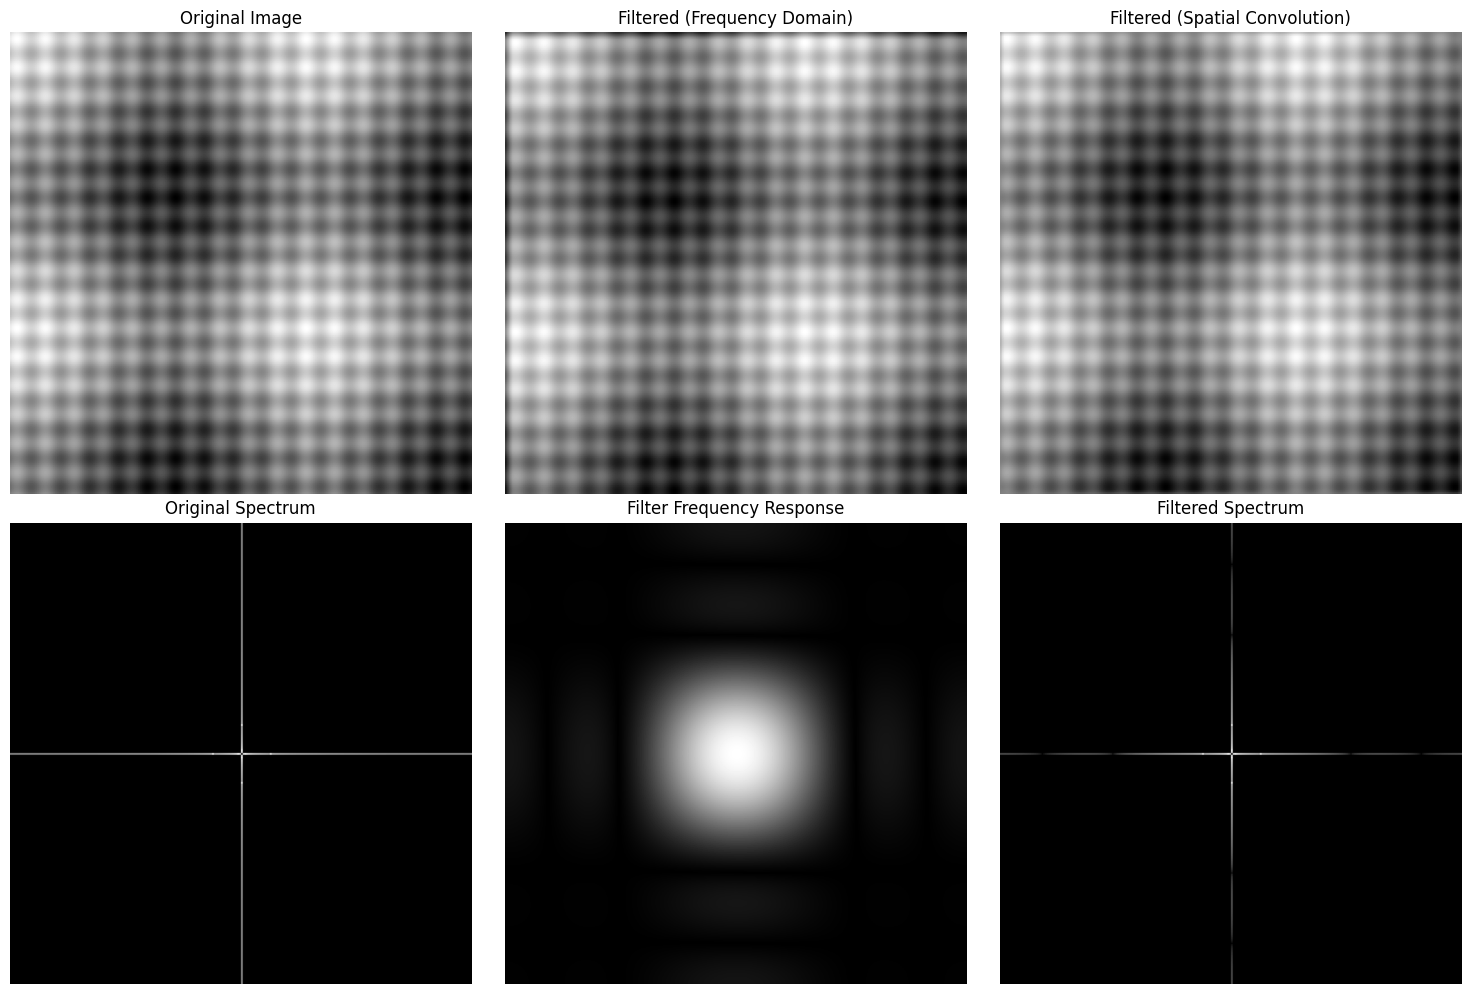


MSE between frequency and spatial filtering: 1.73e-01


In [15]:
test_filter_kernel(kernel)